## Amazon Product Reviews Sentiment Analysis with Python

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment expressed in a piece of text. The goal is to understand whether the sentiment of the text is positive, negative, or neutral. 

In [1]:
#importing the Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load Dataset
ap = pd.read_csv(r"C:\Users\Baliqees\Desktop\Filt\Dataset\Amazon Product Review.txt")
ap.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


from the above we can see that the dataset contains some products, User and review information. The data that we will be using most for this analysis are 'star_rating','review_headline','review_body'and 'sentiment'

star_rating - These are numbering from 1 to 5 where 1 is the worst and 5 is the best review.

review_body - This variable contains the complete product review information.

review_headline - As the name implies, this is the headline to the review body

sentiment - The postive (1) and negative (0) sentiments

## Lets quickly carry out some EDA

In [3]:
#Checking for missing data
ap.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

The dataset has not missing value

In [4]:
#checking for the overview of the data
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [5]:
#checking for the number of rows and columns
ap.shape

(30846, 16)

There are 30846 rows and 16 columns

In [6]:
ap.duplicated().sum()

0

There are no duplicate value(s)

In [7]:
ap.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


In [9]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

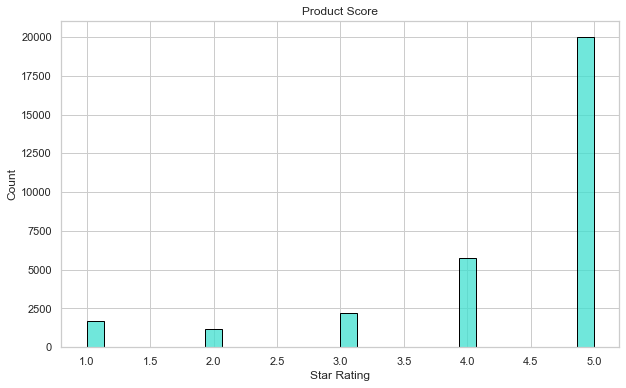

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=ap, x='star_rating', color='turquoise', edgecolor='black', bins=30)
plt.title('Product Score')
plt.xlabel('Star Rating')
plt.ylabel('Count')

plt.show()

from the plot above, most ratings are positive, this leads me to believe that most reviews will be pretty positive too, which will be analyzed in a while

In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [15]:
pip install wordcloud==1.8.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wordcloud==1.8.0 (from versions: none)
ERROR: No matching distribution found for wordcloud==1.8.0


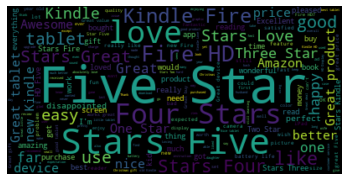

In [20]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

#Creating Stopwords list

stopwords = set(stopwords.words('english'))
stopwords.update(["br","href"])
textt = " ".join(review for review in ap.review_headline)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s check out that how many counts are there for positive and negative sentiments.

In [17]:
ap['sentiment'].value_counts()

1    25767
0     5079
Name: sentiment, dtype: int64

The positive sentiment(1) has the highest number

In [73]:
ap['sentiment'] = ap['sentiment'].replace({0 : 'negative'})
ap['sentiment'] = ap['sentiment'].replace({1 : 'positive'})
fig = px.histogram(ap, x="sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

To have the better picture of the importance of the words let’s create the Wordcloud of all the words with sentiment = 0 i.e. negative

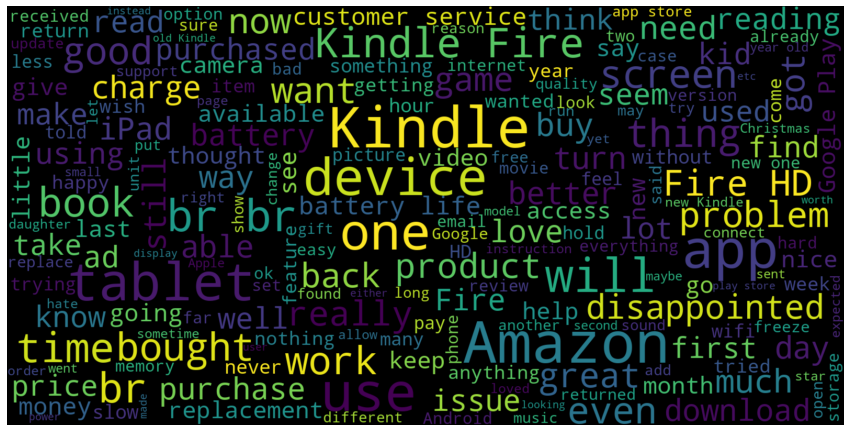

In [66]:
consolidated = ' '.join(word for word in ap['review_body'][ap['sentiment'] == 'negative'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Let’s do the same for all the words with sentiment = 1 i.e. positive

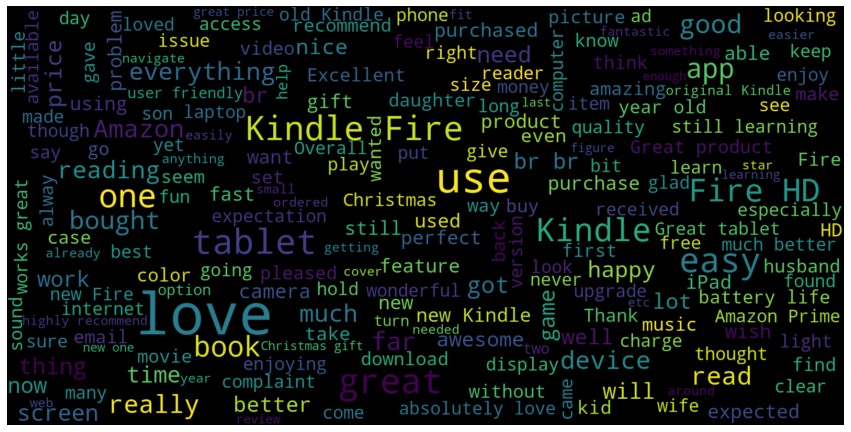

In [67]:
consolidated=' '.join(word for word in ap['review_body'][ap['sentiment']== 'positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Now we have a clear picture of the words we have in both the categories.

# Building the Model

Finally, we can build the sentiment analysis model!

This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative.

This is a classification task, so we will train a simple logistic regression model to do it

There are a few steps we need to take:

Data Cleaning

We will be using the summary data to come up with predictions. First, we need to remove all punctuation from the data.

In [25]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
ap['review_body'] = ap['review_body'].apply(remove_punctuation)
ap = ap.dropna(subset=['review_headline'])
ap['review_headline'] = ap['review_headline'].apply(remove_punctuation)

Spliting Dataframe The new data frame should only have two columns — “ review_headline ” (the review text data), and “ sentiment ” (the target variable).

In [24]:
apNew = ap[['review_headline','sentiment']]
apNew.head()

,review_headline,sentiment
0,Five Stars,positive
1,Lots of ads Slow processing speed Occasionally...,negative
2,Well thought out device,positive
3,Not all apps/games we were looking forward to ...,positive
4,Five Stars,positive


## We will now split the data frame into train and test sets. 80% of the data will be used for training, and 20% will be used for testing.

In [26]:
# random split train and test data
index = ap.index
ap['random_number'] = np.random.randn(len(index))
train = ap[ap['random_number'] <= 0.8]
test = ap[ap['random_number'] > 0.8]

Creating Bag of Words

Next, we will use a count vectorizer from the Scikit-learn library.

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [27]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['review_headline'])
test_matrix = vectorizer.transform(test['review_headline'])

Import Logitic Regression

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=6000)

Split target and independent variables


In [29]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Fitting Model on Data

In [30]:
lr.fit(X_train,y_train)


LogisticRegression(max_iter=6000)

Make Predictions

In [31]:
predictions = lr.predict(X_test)
print(predictions)

['positive' 'positive' 'positive' ... 'positive' 'positive' 'positive']


We have successfully built a simple logistic regression model, and trained the data on it. We also made predictions
using the model.

#  Testing

Let's test the accuracy of the Model!!

In [32]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 643,  186],
       [ 414, 5397]], dtype=int64)

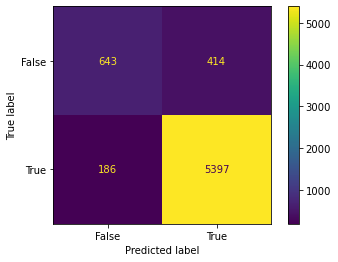

In [33]:

from sklearn import metrics
cm = confusion_matrix(y_test,predictions)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

## The Classification Report

In [34]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.61      0.78      0.68       829
    positive       0.97      0.93      0.95      5811

    accuracy                           0.91      6640
   macro avg       0.79      0.85      0.81      6640
weighted avg       0.92      0.91      0.91      6640



In [70]:
from sklearn.metrics import accuracy_score

# Assuming 'model' is your trained model, 'X_test' is your test features, and 'y_test' is your true labels
predictions = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print(f'Overall Accuracy on Test Data: {accuracy:.2f}')

Overall Accuracy on Test Data: 0.91


The overall accuracy of the model on the test data is around 91%, which is pretty good considering

we didn’t do any feature extraction or much preprocessing

## CONCLUSION
In this era where individuals can effortlessly share their opinions, and data is generated abundantly within seconds, extracting meaningful insights from such data is crucial for organizations to make informed decisions. Sentiment Analysis in Python emerges as a pivotal element in this process.

Throughout this exploration, we delved into the intricacies of sentiment analysis, uncovering diverse methods to execute it using Python.

## AND THAT'S ALL